In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

from rpi_weather_display.providers import owmWeather
import rpi_weather_display

# Auto reload
%load_ext autoreload
%autoreload 2

# Set DPI
plt.rcParams['figure.dpi'] = 72

In [2]:
forecast = owmWeather(lat=52.494117, long=13.422371, api_key=os.environ["OWM_API_KEY"])
background_color = 233

## Current weather

In [3]:
c_text = forecast.get_current_weather()

In [4]:
print(c_text)

{'temperature': 8.59, 'temperature_feels_like': -2.2, 'description': 'scattered clouds', 'weather_icon_name': '03d', 'rain': 0}


In [5]:
c_image = rpi_weather_display.create_current_image(c_text, color=background_color)

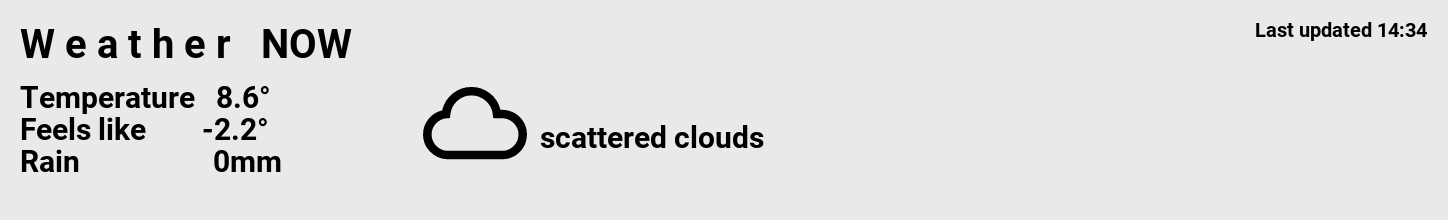

In [6]:
c_image

## Hourly plot

In [7]:
h_data = forecast.get_hourly_data()

In [8]:
print(h_data[0])

{'time': datetime.datetime(2021, 3, 27, 14, 0, tzinfo=datetime.timezone(datetime.timedelta(seconds=3600), 'CET')), 'temperature': 8.59, 'rain': 0.48}


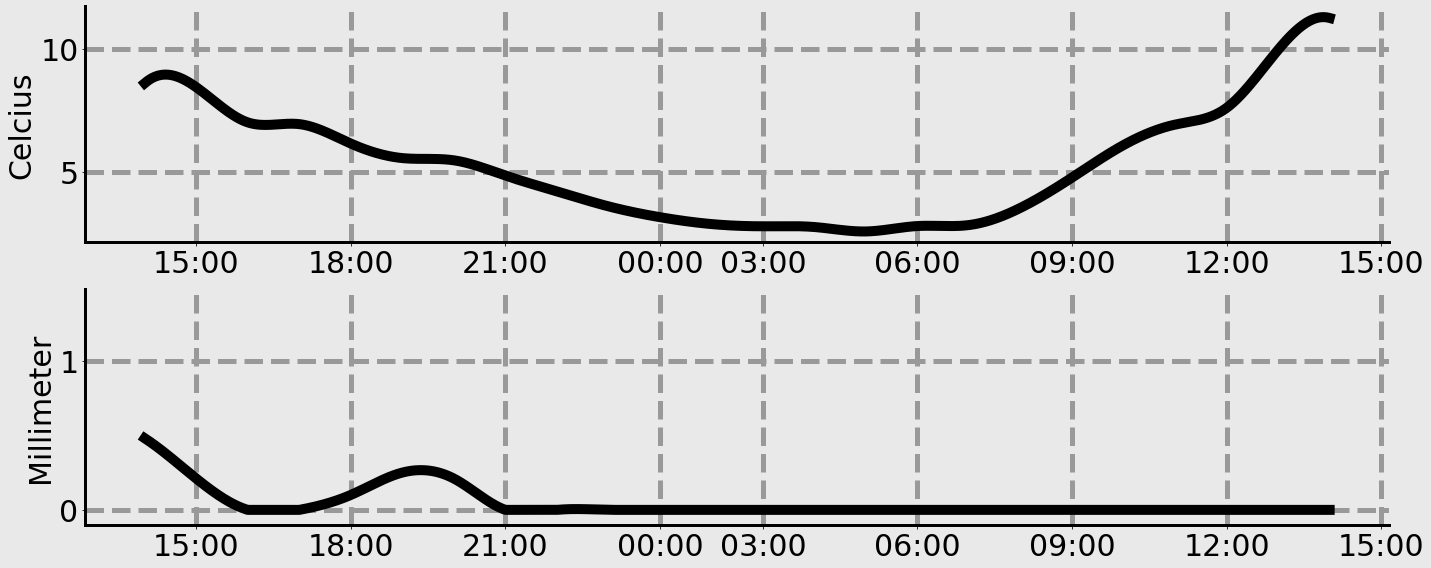

In [9]:
h_plot = rpi_weather_display.create_hourly_plot(h_data, color=background_color)

## Daily weather plot

In [10]:
d_data = forecast.get_daily_data()

In [11]:
print(d_data[0])

{'time': datetime.datetime(2021, 3, 27, 11, 0), 'temperature_min': 3.59, 'temperature_day': 9.07, 'temperature_max': 10.05, 'weather_icon_name': '10d', 'rain': 4.53}


In [12]:
d_image = rpi_weather_display.create_daily_image(
    daily_data=d_data,
    color=background_color,
)

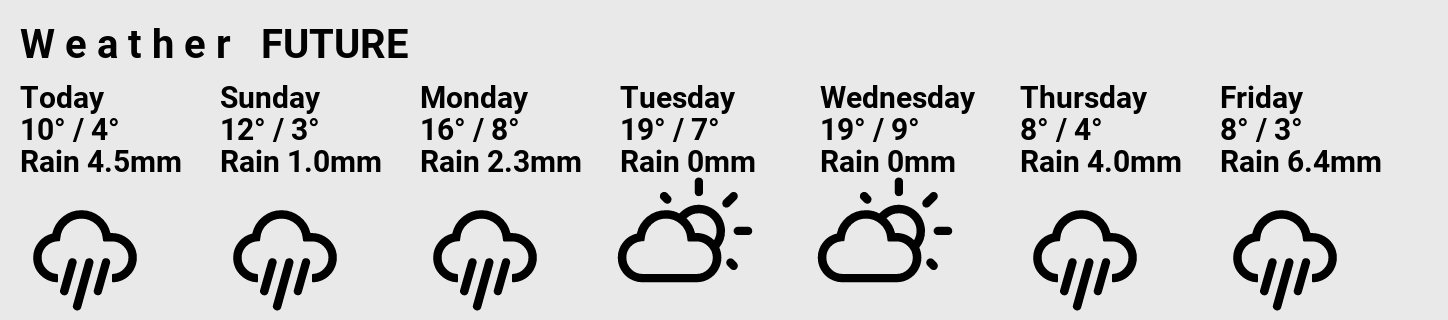

In [13]:
d_image

# Full display image

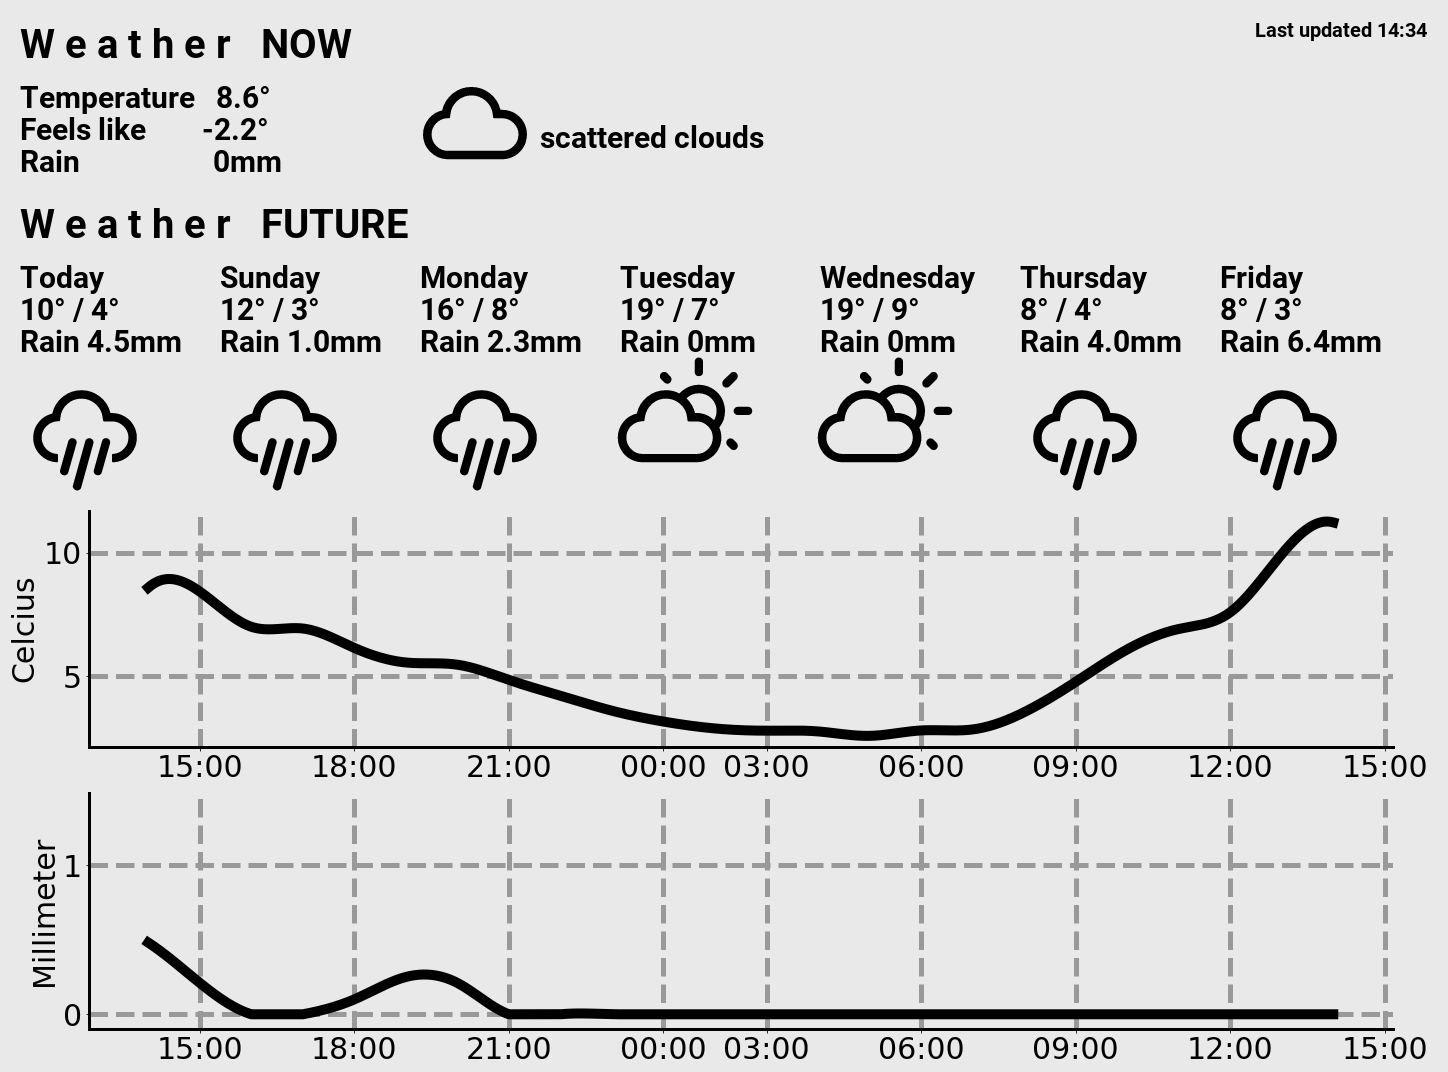

In [14]:
rpi_weather_display.create_forecast_image(
    hourly=rpi_weather_display.convert_plt_fig_to_pil(h_plot),
    daily=d_image,
    current=c_image,
    color=background_color,
)